   val1  val2  val3
0     1     1   1.0
1     1     2   0.5
2    -1    -2   0.5
3    -2    -1   2.0
4     2     2   1.0
5     0     0   NaN


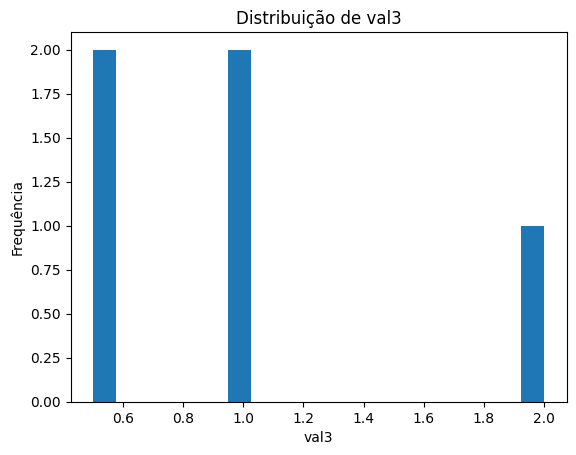

In [1]:
import pandas as pd
from src.processamento import processar
from src.visualizacao import plot_histograma, plot_series, plot_boxplot

df = pd.DataFrame({"val1": [1, 1, -1, -2, 2, 0], "val2": [1, 2, -2, -1, 2, 0]})
df_proc = processar(df, ao_dividir_zero="nan")
print(df_proc)

plot_histograma(df_proc, "val3", titulo="Distribuição de val3")
# plot_series(df_proc, "val3", titulo="Série de val3")
# plot_boxplot(df_proc, ["val1", "val2", "val3"], titulo="Boxplot val1/val2/val3")


OK: src criado em e:\engDados-Solucoes\notebooks\src
sys.path[0:3] = ['e:\\engDados-Solucoes\\notebooks', 'e:\\engDados-Solucoes\\notebooks\\src', 'c:\\Users\\luciana.santos\\AppData\\Local\\anaconda3\\python312.zip']
   val1  val2  val3
0     1     1   1.0
1     1     2   0.5
2    -1    -2   0.5
3    -2    -1   2.0
4     2     2   1.0
5     0     0   NaN


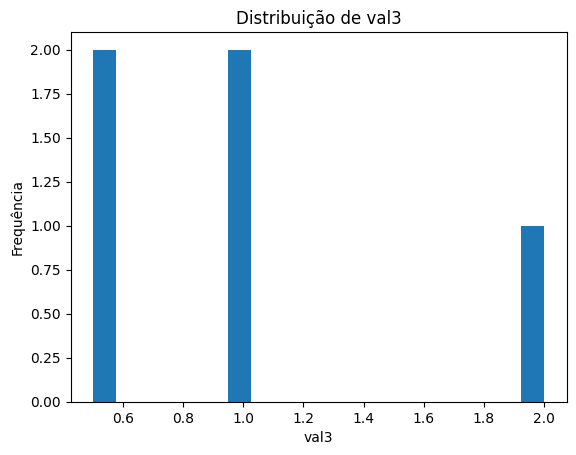

In [2]:
# === SETUP RÁPIDO PARA USAR src/ NO NOTEBOOK ===
import os, sys, textwrap, pathlib

ROOT = pathlib.Path(os.getcwd())
SRC = ROOT / "src"
(SRC).mkdir(exist_ok=True)
(SRC / "__init__.py").write_text("", encoding="utf-8")

# processamento.py
proc_code = r'''
import numpy as np
import pandas as pd

def processar(df: pd.DataFrame, ao_dividir_zero: str = "nan") -> pd.DataFrame:
    if ao_dividir_zero not in {"nan", "inf", "raise"}:
        raise ValueError("ao_dividir_zero deve ser 'nan', 'inf' ou 'raise'.")
    d = df.copy()
    d["val1"] = pd.to_numeric(d["val1"], errors="coerce")
    d["val2"] = pd.to_numeric(d["val2"], errors="coerce")
    if ao_dividir_zero == "raise" and (d["val2"] == 0).any():
        raise ZeroDivisionError("val2 contém zero, impossível dividir.")
    d["val3"] = d["val1"] / d["val2"]
    if ao_dividir_zero == "nan":
        d.loc[~np.isfinite(d["val3"]), "val3"] = np.nan
    return d
'''
(SRC / "processamento.py").write_text(proc_code, encoding="utf-8")

# visualizacao.py
viz_code = r'''
import matplotlib.pyplot as plt
import pandas as pd

def plot_histograma(df: pd.DataFrame, coluna: str, titulo: str | None = None, salvar_em: str | None = None):
    serie = pd.to_numeric(df[coluna], errors="coerce")
    plt.figure(); serie.plot(kind="hist", bins=20)
    plt.xlabel(coluna); plt.ylabel("Frequência"); plt.title(titulo or f"Histograma de {coluna}")
    if salvar_em: plt.savefig(salvar_em, bbox_inches="tight")
    plt.show()

def plot_series(df: pd.DataFrame, coluna: str, titulo: str | None = None, salvar_em: str | None = None):
    serie = pd.to_numeric(df[coluna], errors="coerce")
    plt.figure(); plt.plot(serie.index, serie.values)
    plt.xlabel("Índice"); plt.ylabel(coluna); plt.title(titulo or f"Série de {coluna}")
    if salvar_em: plt.savefig(salvar_em, bbox_inches="tight")
    plt.show()

def plot_boxplot(df: pd.DataFrame, colunas: list[str], titulo: str | None = None, salvar_em: str | None = None):
    dados = [pd.to_numeric(df[c], errors="coerce") for c in colunas]
    plt.figure(); plt.boxplot(dados, labels=colunas); plt.title(titulo or f"Boxplot: {', '.join(colunas)}")
    if salvar_em: plt.savefig(salvar_em, bbox_inches="tight")
    plt.show()
'''
(SRC / "visualizacao.py").write_text(viz_code, encoding="utf-8")

# garante que o Python "enxerga" a pasta atual e src/
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))
if str(SRC) not in sys.path:
    sys.path.insert(0, str(SRC))

print("OK: src criado em", SRC)
print("sys.path[0:3] =", sys.path[0:3])

# --- teste rápido de import e uso ---
import pandas as pd
from src.processamento import processar
from src.visualizacao import plot_histograma, plot_series, plot_boxplot

df = pd.DataFrame({"val1": [1, 1, -1, -2, 2, 0], "val2": [1, 2, -2, -1, 2, 0]})
df_proc = processar(df, ao_dividir_zero="nan")
print(df_proc)

# desenha um gráfico simples (histograma)
plot_histograma(df_proc, "val3", titulo="Distribuição de val3")


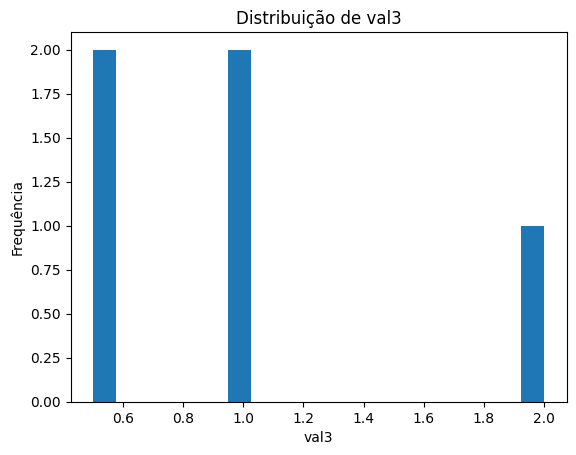

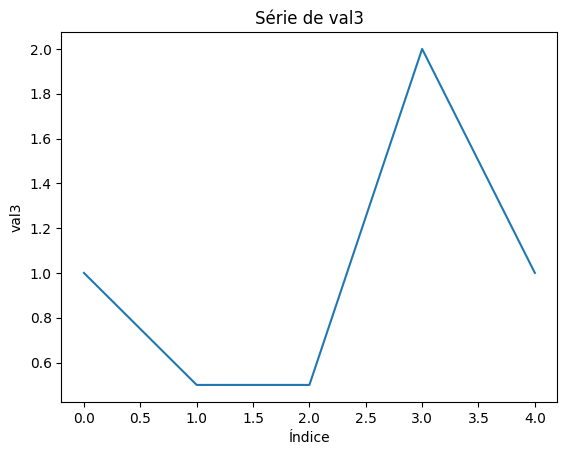

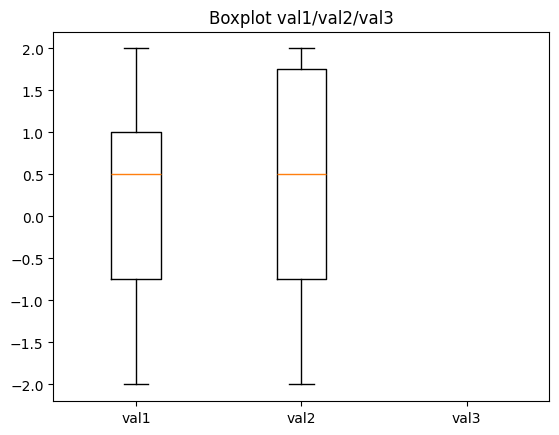

In [3]:
from src.visualizacao import plot_histograma, plot_series, plot_boxplot

plot_histograma(df_proc, "val3", titulo="Distribuição de val3")
plot_series(df_proc, "val3", titulo="Série de val3")
plot_boxplot(df_proc, ["val1","val2","val3"], titulo="Boxplot val1/val2/val3")


In [4]:
import pandas as pd
from src.processamento_validado import processar_validado

df = pd.DataFrame({"val1": [1, 1, -1, -2, 2, 0], "val2": [1, 2, -2, -1, 2, 0]})
df_proc = processar_validado(df, ao_dividir_zero="nan")
df_proc


,val1,val2,val3
0,1.0,1.0,1.0
1,1.0,2.0,0.5
2,-1.0,-2.0,0.5
3,-2.0,-1.0,2.0
4,2.0,2.0,1.0
5,0.0,0.0,NaN


In [5]:
import pandas as pd
from src.processamento_validado import processar_validado

def test_processar_validado_ok():
    df = pd.DataFrame({"val1": [1, 1, -1, -2, 2], "val2": [1, 2, -2, -1, 2]})
    out = processar_validado(df)
    assert "val3" in out.columns
    assert len(out) == 5


In [6]:
import pandas as pd
import ipywidgets as w
from IPython.display import display
from src.processamento import processar
from src.visualizacao import plot_histograma

# dados de exemplo
df = pd.DataFrame({"val1":[1,1,-1,-2,2,0], "val2":[1,2,-2,-1,2,0]})
modo = w.Dropdown(options=["nan","inf","raise"], value="nan", description="Divisão por zero")
btn  = w.Button(description="Processar")

out = w.Output()

def on_click(_):
    with out:
        out.clear_output()
        df_proc = processar(df, ao_dividir_zero=modo.value)
        display(df_proc.head())
        plot_histograma(df_proc, "val3", titulo="Distribuição de val3")

btn.on_click(on_click)
display(w.VBox([modo, btn, out]))
